# ANALYZING STUDENT MENTAL HEALTH USING SQL AND PYTHON
The analysis aims to uncover correlations and patterns between various factors such as language proficienc, social connectedness, and mental health indicators like levels of depression and anxiety.

## IMPORT LIBRARY

In [1]:
import sqlite3
import pandas as pd

df=pd.read_csv('/Users/susie/Documents/Proj SQL/SQL - MENTAL HEALTH/students.csv')

In [2]:
conn=sqlite3.connect('/Users/susie/Documents/Proj SQL/mentalhealth.db',timeout=10)

In [3]:
df.to_sql(name="students", con=conn, if_exists='replace', index=False)

conn.commit()

In [4]:
%load_ext sql
%sql sqlite:///mentalhealth.db

Connecting to 'sqlite:///mentalhealth.db'

## UNDERSTAND THE DATASET

In [ ]:
#Display full values
%config SqlMagic.displaylimit = None

In [41]:
%%sql
select *
from students

Running query in 'sqlite:///mentalhealth.db'

inter_dom,region,gender,academic,age,age_cate,stay,stay_cate,japanese,japanese_cate,english,english_cate,intimate,religion,suicide,dep,deptype,todep,depsev,tosc,apd,ahome,aph,afear,acs,aguilt,amiscell,toas,partner,friends,parents,relative,profess,phone,doctor,reli,alone,others,internet,partner_bi,friends_bi,parents_bi,relative_bi,professional_bi,phone_bi,doctor_bi,religion_bi,alone_bi,others_bi,internet_bi
Inter,SEA,Male,Grad,24.0,4.0,5.0,Long,3.0,Average,5.0,High,None,Yes,No,No,No,0.0,Min,34.0,23.0,9.0,11.0,8.0,11.0,2.0,27.0,91.0,5.0,5.0,6.0,3.0,2.0,1.0,4.0,1.0,3.0,4.0,None,Yes,Yes,Yes,No,No,No,No,No,No,No,No
Inter,SEA,Male,Grad,28.0,5.0,1.0,Short,4.0,High,4.0,High,None,No,No,No,No,2.0,Min,48.0,8.0,7.0,5.0,4.0,3.0,2.0,10.0,39.0,7.0,7.0,7.0,4.0,4.0,4.0,4.0,1.0,1.0,1.0,None,Yes,Yes,Yes,No,No,No,No,No,No,No,No
Inter,SEA,Male,Grad,25.0,4.0,6.0,Long,4.0,High,4.0,High,Yes,Yes,No,No,No,2.0,Min,41.0,13.0,4.0,7.0,6.0,4.0,3.0,14.0,51.0,3.0,3.0,3.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,None,No,No,No,No,No,No,No,No,No,No,No
Inter,EA,Female,Grad,29.0,5.0,1.0,Short,2.0,Low,3.0,Average,No,No,No,No,No,3.0,Min,37.0,16.0,10.0,10.0,8.0,6.0,4.0,21.0,75.0,5.0,5.0,5.0,5.0,5.0,2.0,2.0,2.0,4.0,4.0,None,Yes,Yes,Yes,Yes,Yes,No,No,No,No,No,No
Inter,EA,Female,Grad,28.0,5.0,1.0,Short,1.0,Low,3.0,Average,Yes,No,No,No,No,3.0,Min,37.0,15.0,12.0,5.0,8.0,7.0,4.0,31.0,82.0,5.0,5.0,5.0,2.0,5.0,2.0,5.0,5.0,4.0,4.0,None,Yes,Yes,Yes,No,Yes,No,Yes,Yes,No,No,No
Inter,SEA,Male,Grad,24.0,4.0,6.0,Long,3.0,Average,4.0,High,Yes,No,No,No,No,6.0,Mild,38.0,18.0,8.0,10.0,8.0,7.0,3.0,29.0,83.0,6.0,5.0,4.0,2.0,1.0,1.0,2.0,1.0,5.0,1.0,None,Yes,Yes,No,No,No,No,No,No,Yes,No,No
Inter,SA,Male,Grad,23.0,4.0,1.0,Short,3.0,Average,5.0,High,Yes,No,No,No,No,3.0,Min,46.0,17.0,6.0,10.0,5.0,3.0,2.0,15.0,58.0,7.0,5.0,7.0,2.0,2.0,1.0,5.0,1.0,1.0,1.0,None,Yes,Yes,Yes,No,No,No,Yes,No,No,No,No
Inter,SEA,Female,Grad,30.0,5.0,2.0,Medium,1.0,Low,1.0,Low,Yes,Yes,Yes,No,No,9.0,Mild,41.0,16.0,20.0,19.0,15.0,11.0,6.0,40.0,127.0,7.0,2.0,2.0,2.0,6.0,2.0,1.0,1.0,3.0,1.0,None,Yes,No,No,No,Yes,No,No,No,No,No,No
Inter,SEA,Female,Grad,25.0,4.0,4.0,Long,4.0,High,4.0,High,No,No,No,Yes,Other,7.0,Mild,36.0,22.0,12.0,13.0,13.0,10.0,6.0,33.0,109.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,None,No,No,No,No,No,No,No,No,No,No,No
Inter,Others,Male,Grad,31.0,5.0,2.0,Medium,1.0,Low,4.0,High,Yes,Yes,No,No,No,3.0,Min,48.0,8.0,4.0,5.0,12.0,3.0,2.0,17.0,51.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,1.0,None,No,No,No,No,No,No,No,No,No,No,No


In [8]:
%%sql
-- Cleaning null values
select count(*) from students
where region is NULL;

Running query in 'sqlite:///mentalhealth.db'

count(*)
18


In [9]:
%%sql
-- delete all data rows where region=null
delete from students
where region is NULL;

Running query in 'sqlite:///mentalhealth.db'

18 rows affected.

++
||
++
++

In [ ]:
%%sql
-- age and stay distribution for each region

select
    region, 
    count(*) as no_student,
    round(avg(age),2) as avg_age,
    round(avg(stay),2) as avg_stay
from students
group by region;

Running query in 'sqlite:///mentalhealth.db'

region,no_student,avg_age,avg_stay
EA,48,21.06,1.83
JAP,69,20.39,2.49
Others,11,24.45,2.18
SA,18,22.83,1.94
SEA,122,20.46,2.11


In [31]:
df=pd.read_csv('/Users/susie/Documents/Proj SQL/SQL - MENTAL HEALTH/students.csv')

In [35]:
import pandas as pd
import numpy as np

#count how many null values in ALL COLUMNS
print(df.isnull().sum())

inter_dom          18
region             18
gender             18
academic           18
age                18
age_cate           18
stay               18
stay_cate          18
japanese           18
japanese_cate      18
english            18
english_cate       18
intimate           26
religion           18
suicide            18
dep                16
deptype            15
todep              18
depsev             13
tosc               18
apd                18
ahome              18
aph                18
afear              18
acs                18
aguilt             18
amiscell           18
toas               18
partner            18
friends            18
parents            18
relative           18
profess            18
 phone             18
doctor             18
reli               18
alone              18
others             18
internet           44
partner_bi          3
friends_bi          3
parents_bi         14
relative_bi        14
professional_bi    14
phone_bi           14
doctor_bi 

In [ ]:
#delete null value in age column 
df.dropna(subset=['age'], inplace=True)
print()

## PERCENTILE BOXPLOT ANALYSIS

In [ ]:
import numpy as np

# Define the percentiles to calculate
percentiles = [10, 25, 50, 75, 90]

def calculate_percentiles(group):
    results = {f"{p}th Percentile": np.percentile(group['age'], p) for p in percentiles}
    return pd.Series(results)

# Group by 'region' and apply the function
percentile_results = df.groupby('region').apply(calculate_percentiles)

# Display the results
print(percentile_results)


        10th Percentile  25th Percentile  50th Percentile  75th Percentile  \
region                                                                       
EA                 18.0             19.0             20.5             22.0   
JAP                18.0             19.0             20.0             21.0   
Others             20.0             20.5             23.0             28.5   
SA                 20.7             21.0             23.0             24.0   
SEA                18.0             19.0             20.0             21.0   

        90th Percentile  
region                   
EA                 23.3  
JAP                22.0  
Others             30.0  
SA                 25.0  
SEA                23.9  


<ipython-input-48-b8298600dfaf>:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  percentile_results = df.groupby('region').apply(calculate_percentiles)


In [ ]:
pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 939.0 kB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


<ipython-input-44-4c9a3a15e060>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='region', y='age', data=df, palette='Set2')


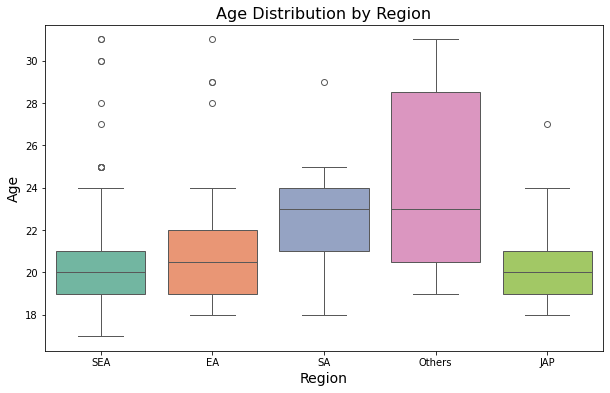

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the dataset for international students - optional
# inter_students = df[df['inter_dom'] == 'Inter'] 

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='region', y='age', data=df, palette='Set2')

# Add title and labels
plt.title('Age Distribution by Region', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Age', fontsize=14)

# Display the plot
plt.show()

The maximum age for all regions is capped at 30 years, suggesting a focus on a younger population demographic, regardless of whether domestic or international student.
- SEA and JAP share the same characteristics, reflecting predominantly younger populations and having tightly clustered age groups.
- South Asia is completely left-skewed distribution, indicating that the majority of individuals are in the older age range, with fewer younger individuals represented.  
- Students from other regions, except those four namely, has the oldest and most diverse population in terms of age

### Description of 3 types of score

- The ‘todep’ field represents the total score of depression using a PHQ-9 test. Using a google search, I was able to find PHQ-9 Test via the National HIV Curriculum webpage (https://www.hiv.uw.edu/page/mental-health-screening/phq-9). The test reveals 9 questions and a score ranking from “None” to “Severe” based on the score of the aforementioned questions. The interpretation table can be viewed below.

- The ‘tosc’ field represents the total score of social connectedness (SCS test). The SCS test is a 20-item scale that assesses based on belonging, closeness, support, and satisfaction. To complete the SCS, individuals are asked to rate each item on a 6-point Likert scale, from 1 (strongly disagree) to 6 (strongly agree). The total score is calculated by summing the scores for all 20 items. Higher scores on the SCS indicate a greater sense of social connectedness (This excerpt was taken from the website below). https://scales.arabpsychology.com/s/social-connectedness-scale/ __=> HIGHER TOSC ARE GOOD AND VICE VERSA__

- The ‘toas’ field represents the total score of acculturative stress (ASISS test). The initial test was a 125 item pool of in Likert format. This format was revised 36 items. The test was broken down into sub themes with the scores ranging from 36–180. See the following image below on scoring and which items related to the sub themes. More information can be found here: https://www.libs.uga.edu/reserves/docs/scans/lundeen%20-%20an%20acculturative.pdf


In [ ]:
# categorizing tosc group by percentile analysis

# Define the percentiles to calculate
percentiles = [25, 50, 75]

def calculate_percentiles(group):
    results = {f"{p}th Percentile": np.percentile(group['tosc'], p) for p in percentiles}
    return pd.Series(results)

# Group by 'inter_dom' and apply the function
percentile_tosc = df.groupby('inter_dom').apply(calculate_percentiles)

# Display the results
print(percentile_tosc)

           25th Percentile  50th Percentile  75th Percentile
inter_dom                                                   
Dom                   31.5             39.0             47.0
Inter                 31.0             40.0             45.0


<ipython-input-66-016c1e2c58e0>:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  percentile_tosc = df.groupby('inter_dom').apply(calculate_percentiles)


In [54]:
%%sql
--> those who in low_csc group have more tendency to suicide (23/42) 
--> having low and mod csc score can result in mod to sev regarding depression severity 

SELECT 
    tosc_grp,
    depsev,
    COUNT(*) AS no_student
FROM (
    SELECT *,
           CASE 
               WHEN tosc < 31 THEN 'low_tosc'
               WHEN tosc >= 31 AND tosc < 47 THEN 'moderate_tosc'
               ELSE 'high_tosc'
           END AS tosc_grp
    FROM students
) AS categorized_students
WHERE inter_dom = 'Inter'
GROUP BY tosc_grp, depsev
ORDER BY tosc_grp, depsev DESC

Running query in 'sqlite:///mentalhealth.db'

tosc_grp,depsev,no_student
high_tosc,Mod,7
high_tosc,Min,23
high_tosc,Mild,8
low_tosc,Sev,4
low_tosc,ModSev,10
low_tosc,Mod,13
low_tosc,Min,2
low_tosc,Mild,13
moderate_tosc,Sev,1
moderate_tosc,ModSev,1


Correlation between length of stay and age: 0.3022344286104206
Correlation Matrix:
           tosc     todep      toas
tosc   1.000000 -0.551795 -0.555860
todep -0.551795  1.000000  0.394095
toas  -0.555860  0.394095  1.000000


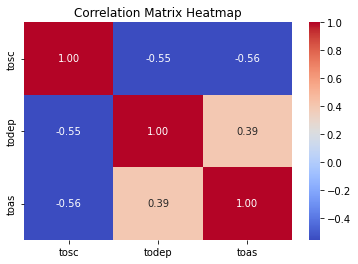

In [ ]:
# correlation bw students’ language proficiency (japanese, english) and their mental health indicators?
correlation = df['stay'].corr(df['age'])  
print(f"Correlation between length of stay and age: {correlation}")

# Correlation matric for 3 score
mentalhealth_score = ['tosc', 'todep', 'toas']  
correlation_matrix = df[mentalhealth_score].corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

Correlation Matrix:
               apd     ahome       aph     afear       acs    aguilt  \
apd       1.000000  0.371330  0.647512  0.572421  0.447805  0.310699   
ahome     0.371330  1.000000  0.397227  0.435714  0.460867  0.412860   
aph       0.647512  0.397227  1.000000  0.640884  0.466109  0.341833   
afear     0.572421  0.435714  0.640884  1.000000  0.412650  0.430499   
acs       0.447805  0.460867  0.466109  0.412650  1.000000  0.402508   
aguilt    0.310699  0.412860  0.341833  0.430499  0.402508  1.000000   
amiscell  0.578559  0.506480  0.546033  0.570425  0.646505  0.497840   
toas      0.803785  0.665134  0.781058  0.759536  0.706895  0.573604   

          amiscell      toas  
apd       0.578559  0.803785  
ahome     0.506480  0.665134  
aph       0.546033  0.781058  
afear     0.570425  0.759536  
acs       0.646505  0.706895  
aguilt    0.497840  0.573604  
amiscell  1.000000  0.870102  
toas      0.870102  1.000000  


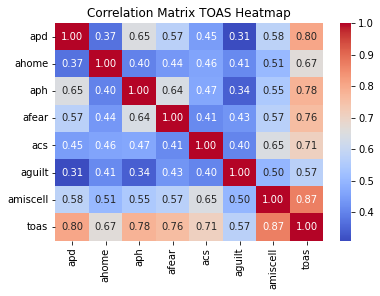

In [48]:
# Correlation matric for toas score
toas_score = ['apd','ahome','aph','afear','acs','aguilt','amiscell','toas']  
correlation_matrix = df[toas_score].corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix TOAS Heatmap')
plt.show()

In [47]:
%%sql
select
    stay,
    round(avg(todep),2) as avg_phq,
    round(avg(toas),2) as avg_as,
    round(avg(tosc),2) as avg_scs
from students
group by stay;

Running query in 'sqlite:///mentalhealth.db'

stay,avg_phq,avg_as,avg_scs
1.0,7.7,71.03,37.94
2.0,8.58,74.87,37.08
3.0,8.87,71.35,37.78
4.0,7.96,78.74,35.0
5.0,7.67,89.0,34.0
6.0,6.0,58.67,38.0
7.0,4.0,45.0,48.0
8.0,10.0,65.0,44.0
10.0,13.0,50.0,32.0


In [63]:
%%sql
select
    depsev,
    min(todep),
    max(todep)
from students
where depsev IN ('Mild','Min','Mod','ModSev','Sev')
group by depsev

Running query in 'sqlite:///mentalhealth.db'

depsev,min(todep),max(todep)
Mild,5.0,9.0
Min,0.0,4.0
Mod,10.0,14.0
ModSev,15.0,19.0
Sev,20.0,25.0


## CLUSTER ANALYSIS 
Using Kmeans and Elbow Method to define nuber of group clustering.

In [8]:
pip install scikit-learn


[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [47]:
from sklearn.cluster import KMeans

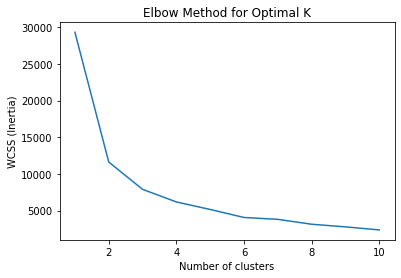

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X = df[['tosc', 'todep']].copy()

wcss = []
for i in range(1, 11):  # Trying different numbers of clusters (from 1 to 10)
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) 

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Inertia)')
plt.show()


__TWO__ is the optimal number of cluster based on elbow method

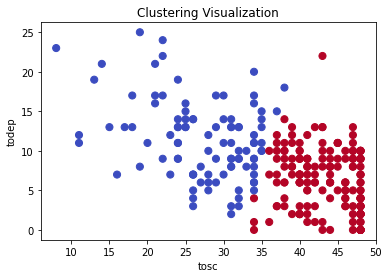

In [51]:
#
kmeans = KMeans(n_clusters=2)

#trainign kmeans cluster
kmeans.fit(X)

#plotting
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=kmeans.labels_, cmap='coolwarm', s=50)

# Add labels and title
plt.xlabel('tosc')
plt.ylabel('todep')
plt.title('Clustering Visualization')
plt.show()


There are 2 seperate group of students regarding Mental Health Indicators: low todep high tosc and vice versa. Most of students who have todep score under 10, which is categorized as Min and Mild depress severity, demonstrate higher scs score. On the other hand, the group have lower csc score is more spread out, which means that, csc score is not the only factors reflect the depress situation of student, and more insights need futher analysis since it is difficult to generalize about their shared characteristics.